<a href="https://colab.research.google.com/github/sandeepsabir/dsproject/blob/main/DSProject_Budget_Prognosis_Arima_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df = pd.read_csv('NewFactOrder.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.shape)
df

(525854, 13)


,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered
0,94940600,11,36200,red,SHIRT/BLOUSE,92/98,TOPS,Pre,4[92-98],2 TODDLER,SHIRT LS,20180121,1.0
1,94940600,12,12030,Blue,DENIM,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,NaN,20180121,1.0
2,94940600,13,7354,offwhite,TEES LS,92/98,TOPS,Pre,4[92-98],2 TODDLER,RIB,20180121,1.0
3,94940800,1,8501,offwhite,DRESSES LS,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,20180121,1.0
4,94940800,2,24256,offwhite,LEGGINGS,104/110,BOTTOMS,Main,5[104-110],3 KIDS,NaN,20180121,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525849,115941200,1,41610,green,BEANIES,44/46,HATS,Main,XHATS,1 BABY,NaN,20210101,1.0
525850,115941300,1,47710,Beige,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,20210101,1.0
525851,115941300,2,7781,blue,TEES LS,104/110,TOPS,Main,5[104-110],3 KIDS,NaN,20210101,1.0
525852,115941300,3,10311,Black,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,20210101,1.0


In [ ]:
df['DateOrderedKey'] = pd.to_datetime(df['DateOrderedKey'], format='%Y%m%d')


In [ ]:
df

,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered
0,94940600,11,36200,red,SHIRT/BLOUSE,92/98,TOPS,Pre,4[92-98],2 TODDLER,SHIRT LS,2018-01-21,1.0
1,94940600,12,12030,Blue,DENIM,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,NaN,2018-01-21,1.0
2,94940600,13,7354,offwhite,TEES LS,92/98,TOPS,Pre,4[92-98],2 TODDLER,RIB,2018-01-21,1.0
3,94940800,1,8501,offwhite,DRESSES LS,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,2018-01-21,1.0
4,94940800,2,24256,offwhite,LEGGINGS,104/110,BOTTOMS,Main,5[104-110],3 KIDS,NaN,2018-01-21,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525849,115941200,1,41610,green,BEANIES,44/46,HATS,Main,XHATS,1 BABY,NaN,2021-01-01,1.0
525850,115941300,1,47710,Beige,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,2021-01-01,1.0
525851,115941300,2,7781,blue,TEES LS,104/110,TOPS,Main,5[104-110],3 KIDS,NaN,2021-01-01,1.0
525852,115941300,3,10311,Black,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,2021-01-01,1.0


In [ ]:
df.set_index('DateOrderedKey', inplace=True)

In [ ]:
df

,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,QuantityOrdered
DateOrderedKey,,,,,,,,,,,,
2018-01-21,94940600,11,36200,red,SHIRT/BLOUSE,92/98,TOPS,Pre,4[92-98],2 TODDLER,SHIRT LS,1.0
2018-01-21,94940600,12,12030,Blue,DENIM,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,NaN,1.0
2018-01-21,94940600,13,7354,offwhite,TEES LS,92/98,TOPS,Pre,4[92-98],2 TODDLER,RIB,1.0
2018-01-21,94940800,1,8501,offwhite,DRESSES LS,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,1.0
2018-01-21,94940800,2,24256,offwhite,LEGGINGS,104/110,BOTTOMS,Main,5[104-110],3 KIDS,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,115941200,1,41610,green,BEANIES,44/46,HATS,Main,XHATS,1 BABY,NaN,1.0
2021-01-01,115941300,1,47710,Beige,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,1.0
2021-01-01,115941300,2,7781,blue,TEES LS,104/110,TOPS,Main,5[104-110],3 KIDS,NaN,1.0


In [ ]:
monthly_df = df.groupby([pd.Grouper(freq='M'), 'ArticleGroupName'])['QuantityOrdered'].sum()

In [ ]:
monthly_df

DateOrderedKey  ArticleGroupName
2018-01-31      ACCESSORIES          256.0
                BODY AND ONESIE     1074.0
                BOTTOMS             6144.0
                DRESSES             2958.0
                HATS                1133.0
                                     ...  
2021-01-31      DRESSES               23.0
                HATS                  37.0
                OUTERWEAR            139.0
                SWIMWEAR               4.0
                TOPS                  96.0
Name: QuantityOrdered, Length: 418, dtype: float64

In [ ]:
monthly_df = df.groupby([pd.Grouper(freq='M'), 'ArticleGroupName'])['QuantityOrdered'].sum().unstack()

In [ ]:
monthly_df

ArticleGroupName,ACCESSORIES,BODY AND ONESIE,BOTTOMS,DRESSES,Discount,ECOM return cost,Giftwrapping,HATS,HOME,OUTERWEAR,SWIMWEAR,Shipment,Stuff,TOPS,Övriga intäkter
DateOrderedKey,,,,,,,,,,,,,,,
2018-01-31,256.0,1074.0,6144.0,2958.0,NaN,NaN,NaN,1133.0,82.0,406.0,16.0,2.0,NaN,4973.0,19.0
2018-02-28,283.0,775.0,4118.0,2184.0,NaN,NaN,NaN,1562.0,71.0,383.0,11.0,1.0,NaN,4108.0,1.0
2018-03-31,247.0,402.0,1336.0,513.0,NaN,NaN,NaN,531.0,88.0,612.0,451.0,2.0,66.0,2390.0,22.0
2018-04-30,470.0,242.0,631.0,194.0,NaN,NaN,NaN,504.0,42.0,413.0,220.0,2.0,12.0,1125.0,11.0
2018-05-31,297.0,298.0,1106.0,468.0,NaN,NaN,NaN,831.0,214.0,366.0,244.0,NaN,11.0,2008.0,NaN
2018-06-30,225.0,1000.0,2978.0,1260.0,NaN,NaN,NaN,801.0,133.0,298.0,140.0,1.0,11.0,4786.0,NaN
2018-07-31,305.0,1299.0,3908.0,1994.0,NaN,NaN,NaN,1274.0,79.0,652.0,642.0,NaN,19.0,5944.0,17.0
2018-08-31,595.0,1136.0,3944.0,1823.0,NaN,NaN,NaN,1676.0,110.0,1228.0,320.0,NaN,22.0,5045.0,4.0
2018-09-30,733.0,230.0,761.0,180.0,NaN,1.0,NaN,558.0,3816.0,644.0,38.0,1.0,13.0,1604.0,8.0


In [ ]:
for group in monthly_df.columns:
  print(group)

ACCESSORIES
BODY AND ONESIE
BOTTOMS
DRESSES
Discount
ECOM return cost
Giftwrapping
HATS
HOME
OUTERWEAR
SWIMWEAR
Shipment
Stuff
TOPS
Övriga intäkter


In [ ]:
monthly_df = df.groupby([pd.Grouper(freq='M'), 'ArticleGroupName'])['QuantityOrdered'].sum().unstack().fillna(0)

In [ ]:
monthly_df.columns[[4,5,6,11,12,14]]
monthly_df.drop(monthly_df.columns[[4,5,6,11,12,14]], axis=1, inplace=True)

In [ ]:
monthly_df

ArticleGroupName,ACCESSORIES,BODY AND ONESIE,BOTTOMS,DRESSES,HATS,HOME,OUTERWEAR,SWIMWEAR,TOPS
DateOrderedKey,,,,,,,,,
2018-01-31,256.0,1074.0,6144.0,2958.0,1133.0,82.0,406.0,16.0,4973.0
2018-02-28,283.0,775.0,4118.0,2184.0,1562.0,71.0,383.0,11.0,4108.0
2018-03-31,247.0,402.0,1336.0,513.0,531.0,88.0,612.0,451.0,2390.0
2018-04-30,470.0,242.0,631.0,194.0,504.0,42.0,413.0,220.0,1125.0
2018-05-31,297.0,298.0,1106.0,468.0,831.0,214.0,366.0,244.0,2008.0
2018-06-30,225.0,1000.0,2978.0,1260.0,801.0,133.0,298.0,140.0,4786.0
2018-07-31,305.0,1299.0,3908.0,1994.0,1274.0,79.0,652.0,642.0,5944.0
2018-08-31,595.0,1136.0,3944.0,1823.0,1676.0,110.0,1228.0,320.0,5045.0
2018-09-30,733.0,230.0,761.0,180.0,558.0,3816.0,644.0,38.0,1604.0


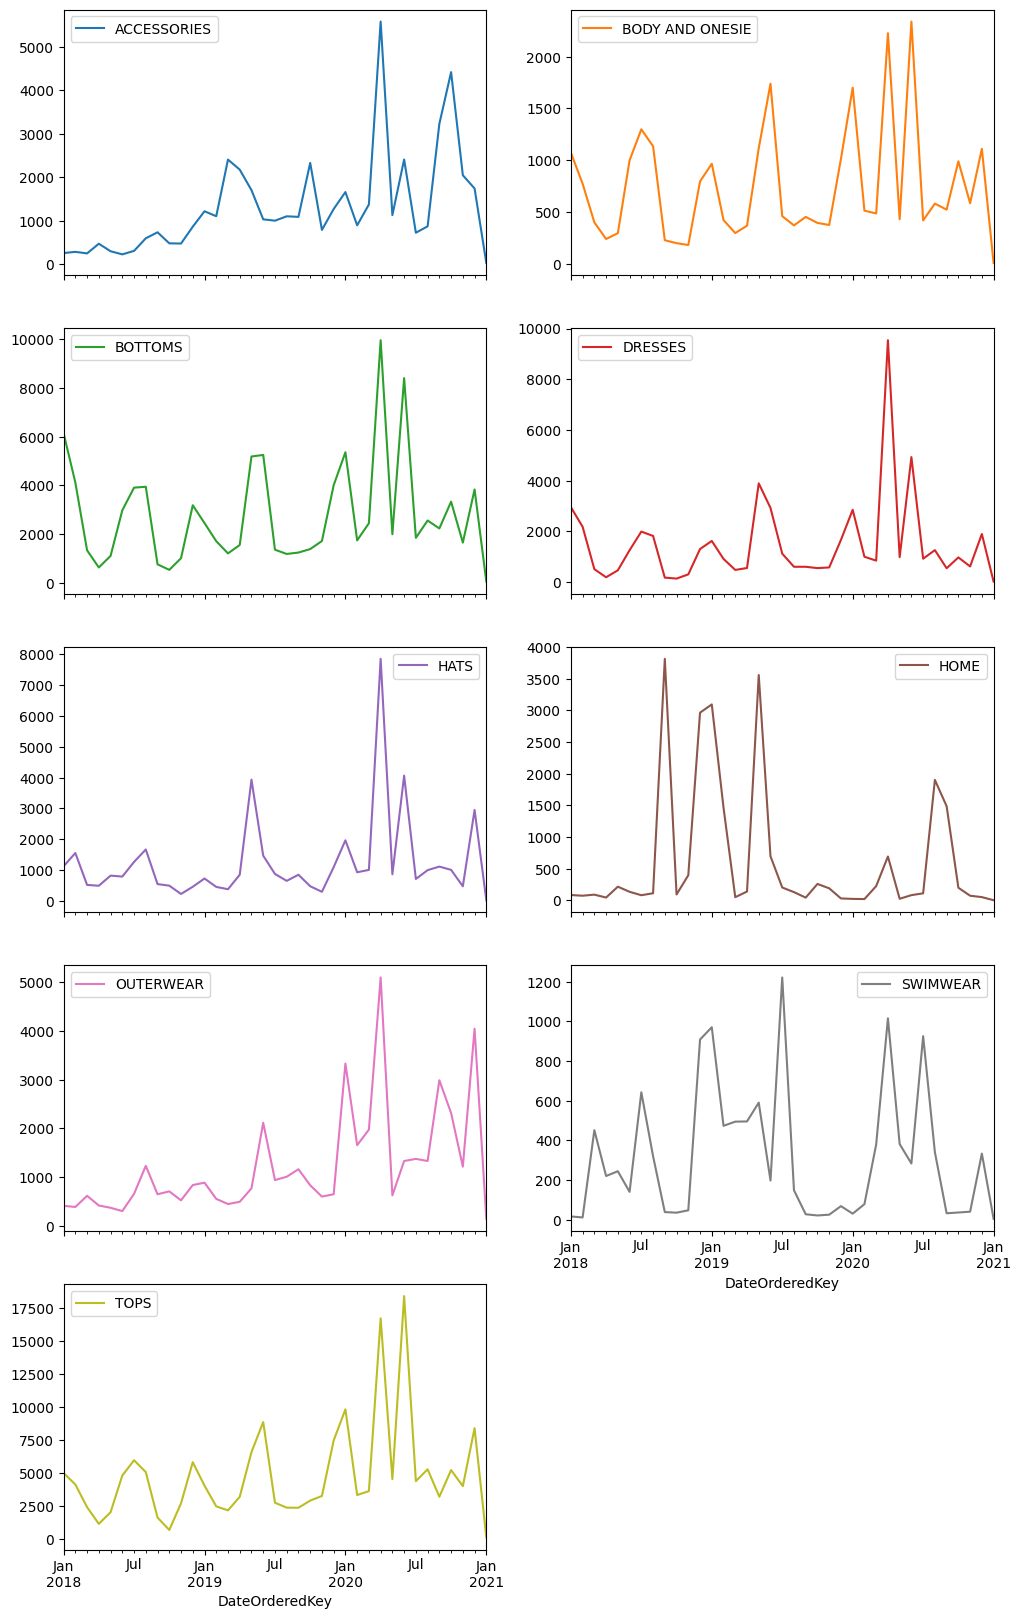

In [ ]:
monthly_df.plot(subplots=True, figsize=(12, 20), layout=(-1, 2))
plt.show()



In [ ]:
from statsmodels.tsa.stattools import adfuller
for group in monthly_df.columns:
  print(group)
  result = adfuller (monthly_df[group])
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ACCESSORIES
ADF Statistic: -1.143212
p-value: 0.697536
Critical Values:
	1%: -3.661
	5%: -2.961
	10%: -2.619
BODY AND ONESIE
ADF Statistic: -6.017034
p-value: 0.000000
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612
BOTTOMS
ADF Statistic: -5.721000
p-value: 0.000001
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612
DRESSES
ADF Statistic: 0.372997
p-value: 0.980457
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
HATS
ADF Statistic: 0.764191
p-value: 0.991036
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
HOME
ADF Statistic: -1.377713
p-value: 0.592913
Critical Values:
	1%: -3.700
	5%: -2.976
	10%: -2.628
OUTERWEAR
ADF Statistic: -0.555511
p-value: 0.880721
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
SWIMWEAR
ADF Statistic: -4.572889
p-value: 0.000145
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612
TOPS
ADF Statistic: -5.469466
p-value: 0.000002
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


ACCESSORIES
BODY AND ONESIE
BOTTOMS
DRESSES
HATS
HOME
OUTERWEAR
SWIMWEAR
TOPS


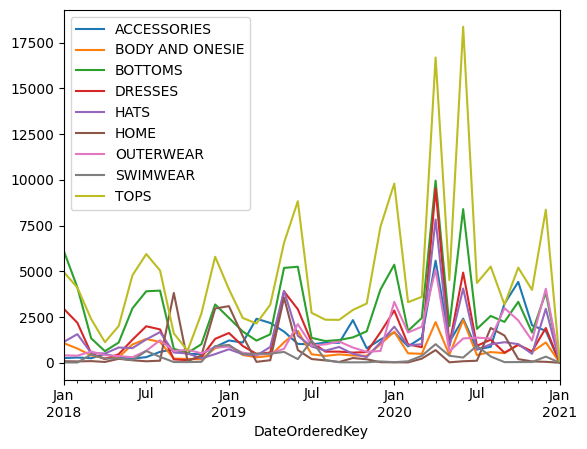

In [ ]:
for group in monthly_df.columns:
  print(group)
  plt=monthly_df[group].plot()
  plt.legend()

ACCESSORIES
BODY AND ONESIE
BOTTOMS
DRESSES
HATS
HOME
OUTERWEAR
SWIMWEAR
TOPS


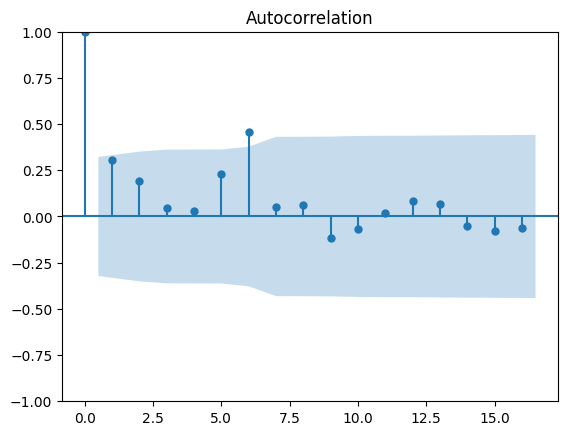

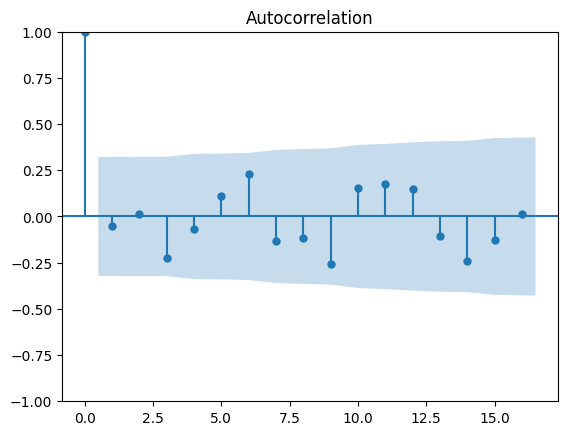

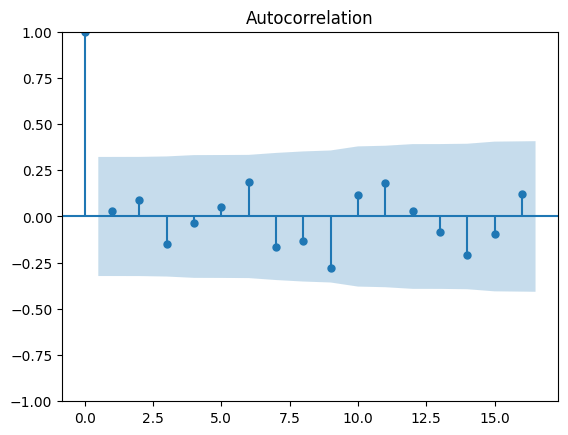

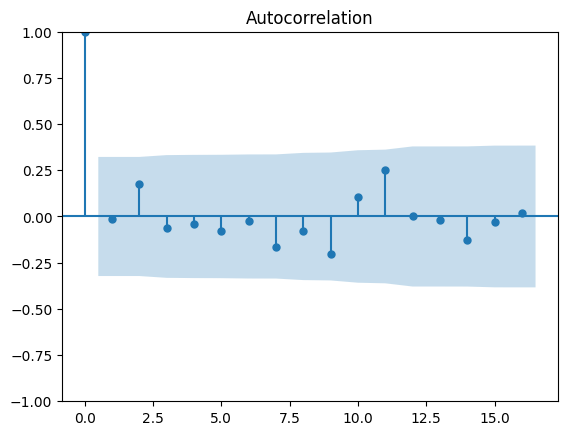

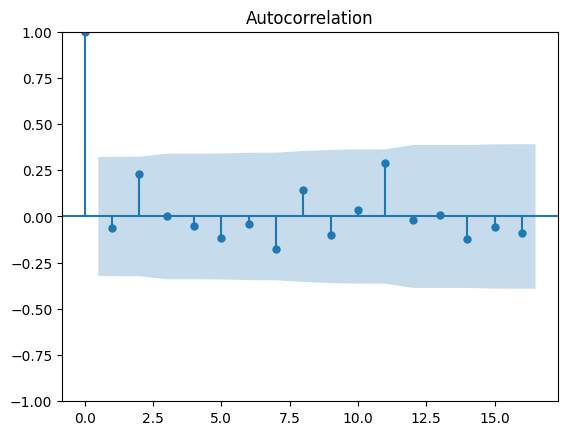

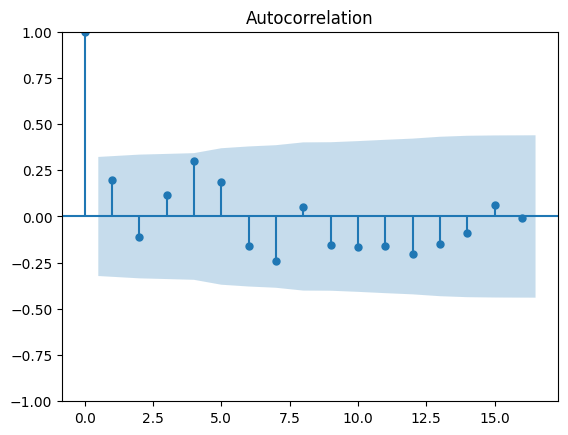

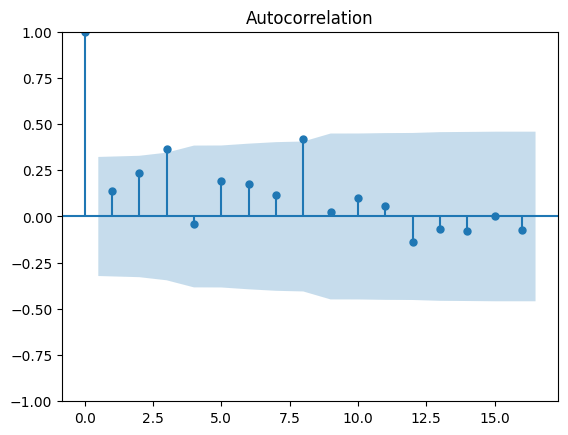

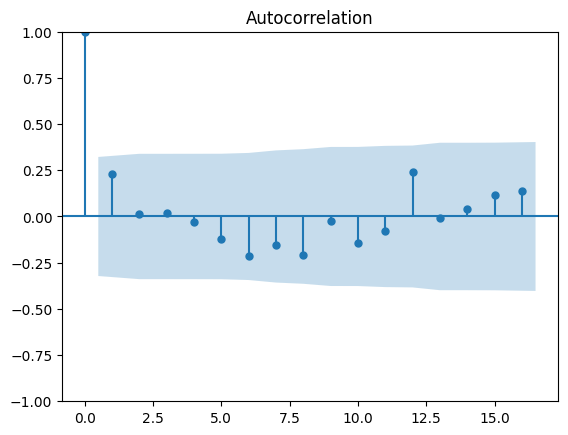

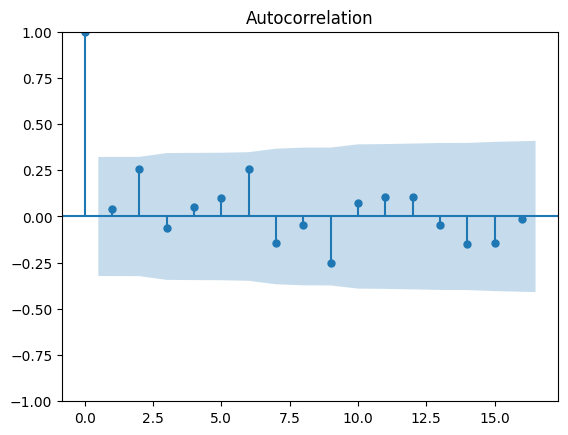

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf


for group in monthly_df.columns:
    group_df = monthly_df[[group]].resample('M').sum()
    print(group)
    plot_acf(group_df.values)

ACCESSORIES
BODY AND ONESIE
BOTTOMS
DRESSES
HATS
HOME
OUTERWEAR
SWIMWEAR
TOPS


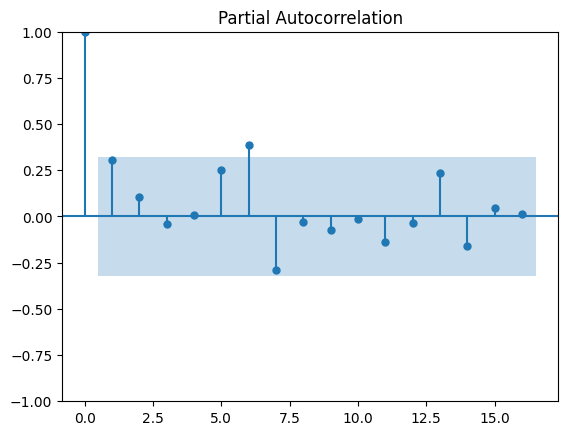

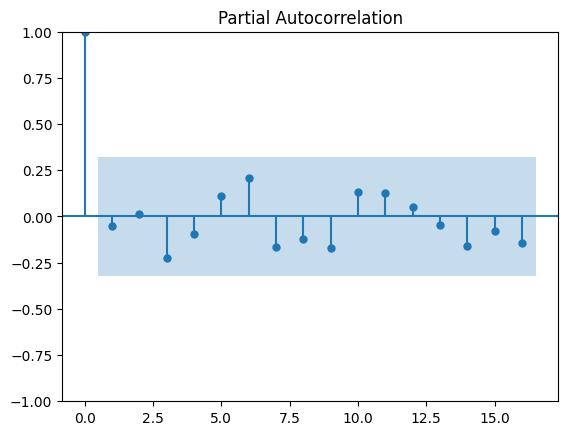

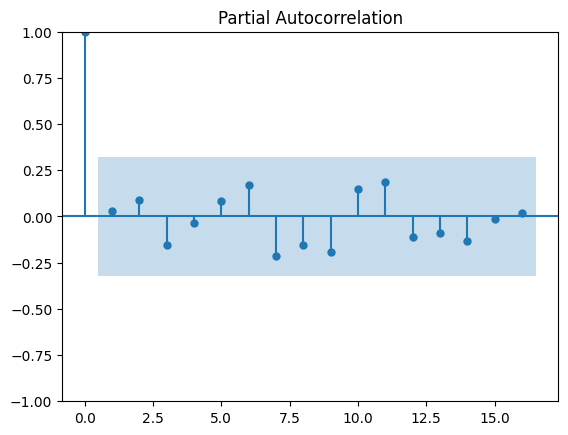

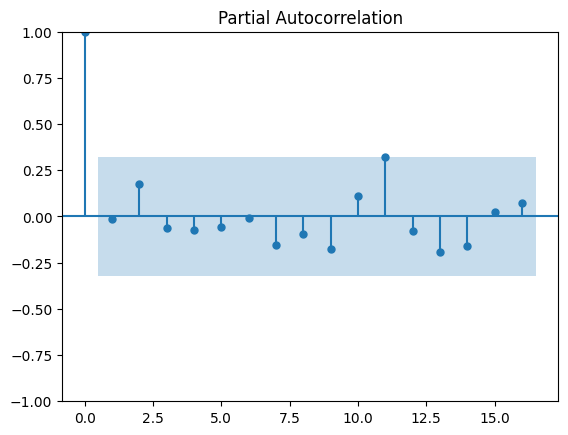

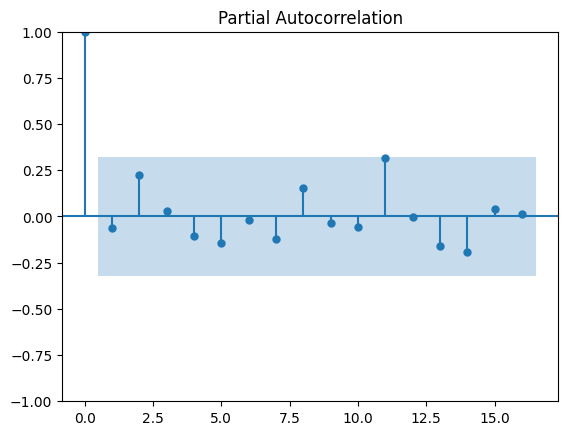

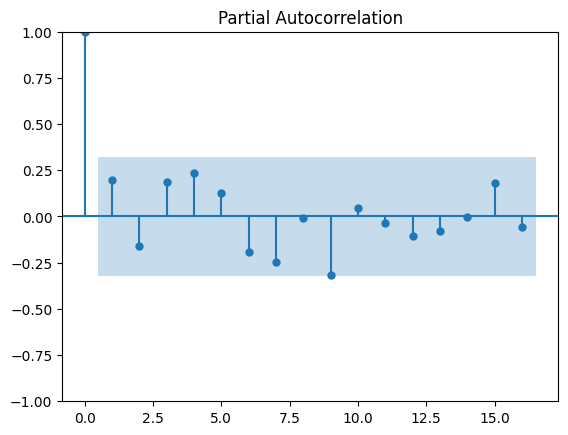

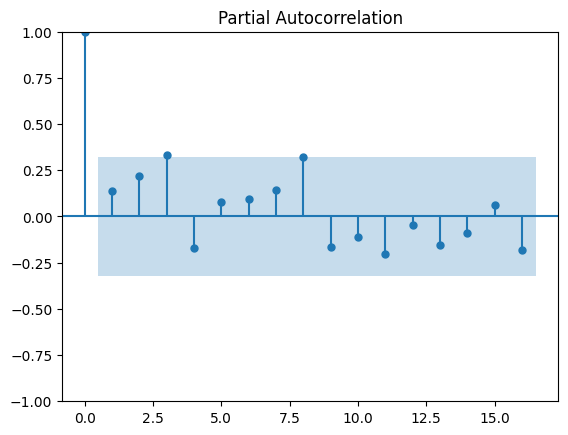

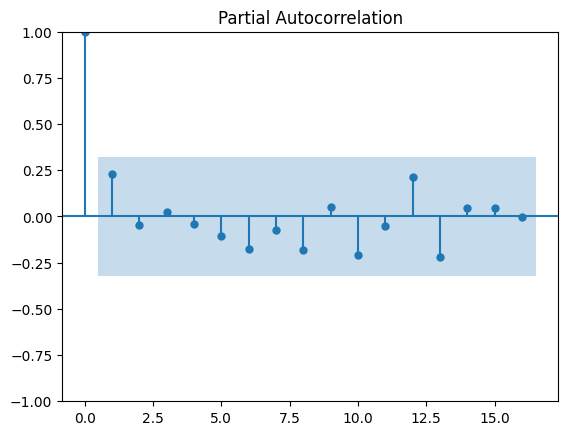

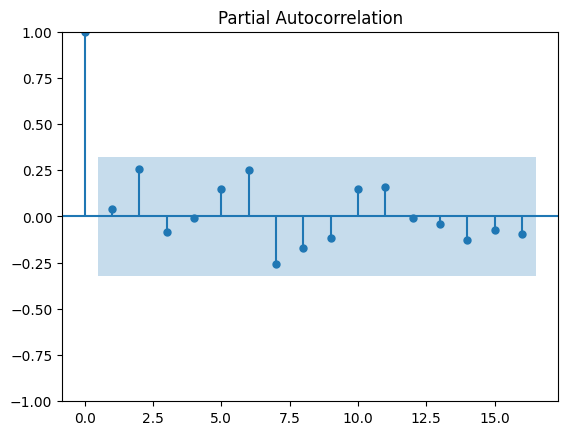

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf


for group in monthly_df.columns:
    group_df = monthly_df[[group]].resample('M').sum()
    print(group)
    plot_pacf(group_df.values)

In [ ]:
# Create a summary dataframe with the predicted values for each article group
summary_df = pd.DataFrame(index=monthly_df.columns, columns=['January','February', 'March', 'April', 'May', 'June','july',
                                                             'August' ,'September', 'October', 'November', 'December'])
for group in monthly_df.columns:
    group_df = monthly_df[[group]].resample('M').sum()
    train_data = group_df.loc[:'2019-12-31']
    test_data = group_df.loc['2019-12-31':]
    model = ARIMA(train_data, order=(1, 0, 1))
    fit_model = model.fit()
    steps = 365
    preds = fit_model.forecast(steps, exog=None, alpha=0.05)
    summary_df.loc[group] = [int(preds[0]), int(preds[1]), int(preds[2]), int(preds[3]), int(preds[4]),
                             int(preds[5]), int(preds[6]), int(preds[7]), int(preds[8]), int(preds[9]), int(preds[10]),int(preds[11])]

# Print the summary dataframe
print(summary_df)


                 January February March April   May  June  july August  \
ArticleGroupName                                                         
ACCESSORIES         1142     1098  1064  1036  1015   997   984    973   
BODY AND ONESIE      925      666   668   668   668   668   668    668   
BOTTOMS             3778     2627  2446  2418  2414  2413  2413   2413   
DRESSES             1641     1220  1211  1211  1211  1211  1211   1211   
HATS                1016      918   929   928   928   928   928    928   
HOME                 641      782   734   751   745   747   746    747   
OUTERWEAR            705      722   725   726   726   726   726    726   
SWIMWEAR             263      307   316   318   318   318   318    318   
TOPS                6118     3968  3767  3748  3747  3747  3747   3747   

                 September October November December  
ArticleGroupName                                      
ACCESSORIES            965     958      952      948  
BODY AND ONESIE     

In [ ]:
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   TOPS   No. Observations:                   24
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -213.654
Date:                Sat, 02 Sep 2023   AIC                            435.308
Time:                        17:48:15   BIC                            440.020
Sample:                    01-31-2018   HQIC                           436.558
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3747.0501    729.675      5.135      0.000    2316.914    5177.186
ar.L1          0.0935      0.435      0.215      0.830      -0.759       0.946
ma.L1          0.5109      0.492      1.038      0.2

In [ ]:
# Fit the best model and make predictions
predicted_values = pd.DataFrame()
for column in monthly_df.columns:
    model = ARIMA(monthly_df[column], order=(1,0,1))
    model_fit = model.fit()
    predicted_values[column] = model_fit.predict(start=monthly_df.index[0], end=monthly_df.index[-1])

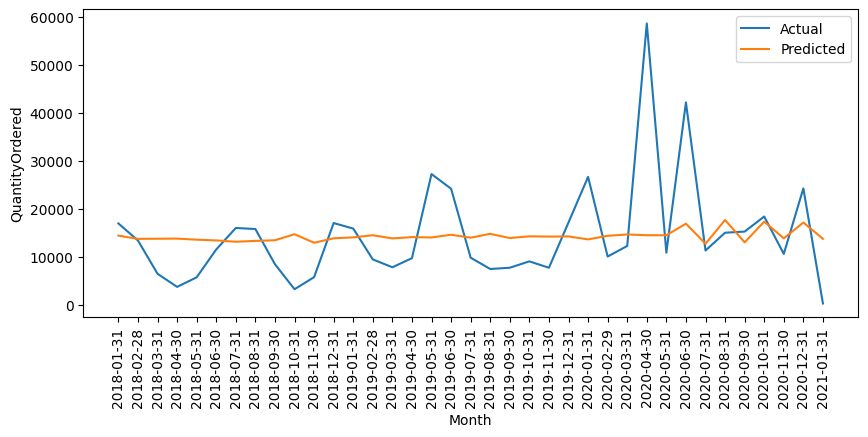

In [ ]:
# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(monthly_df.index.astype(str), monthly_df.sum(axis=1), label='Actual')
plt.plot(monthly_df.index.astype(str), predicted_values.sum(axis=1), label='Predicted')
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('QuantityOrdered')
plt.legend()
plt.show()

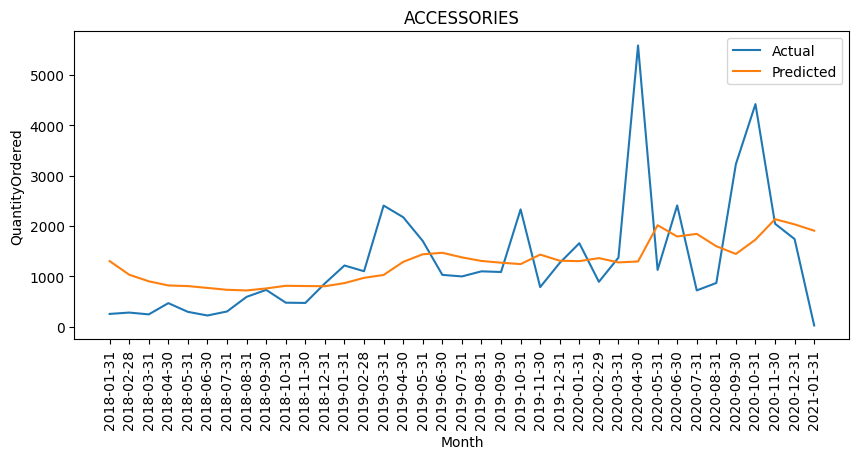

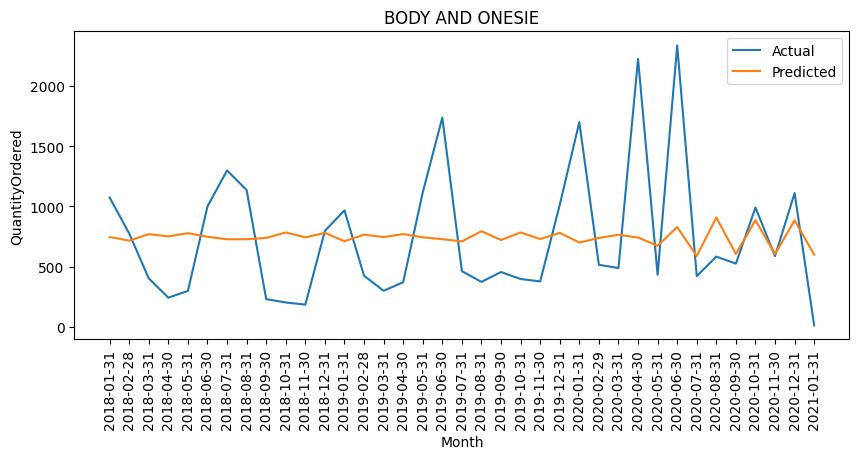

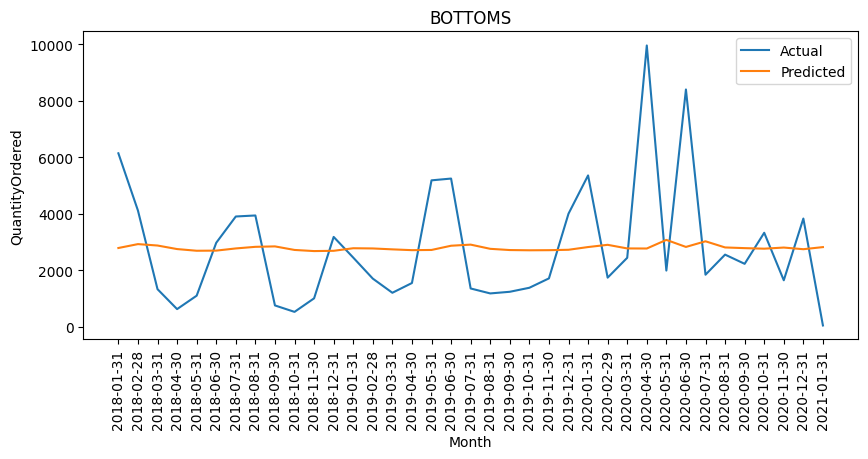

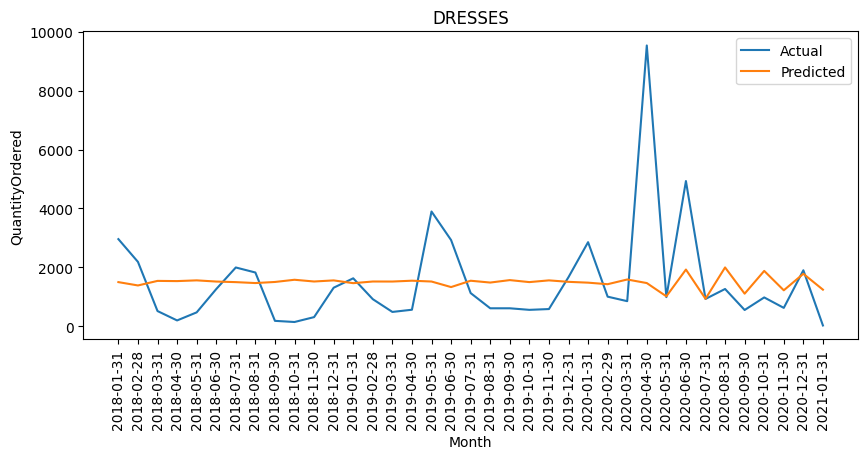

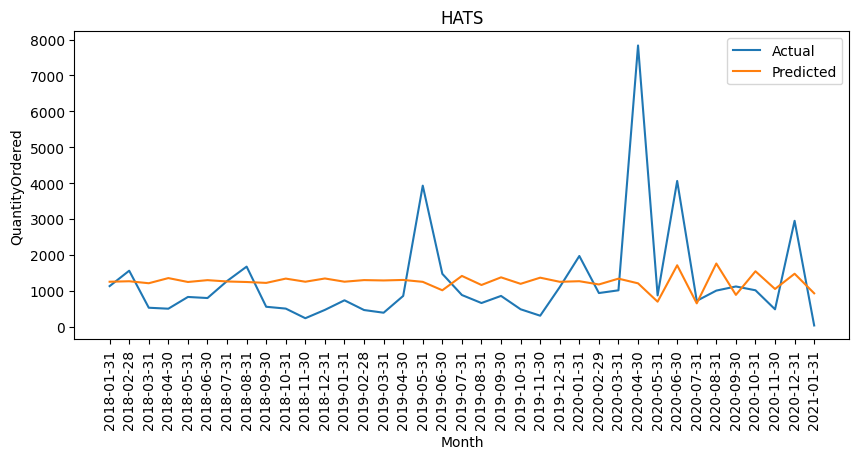

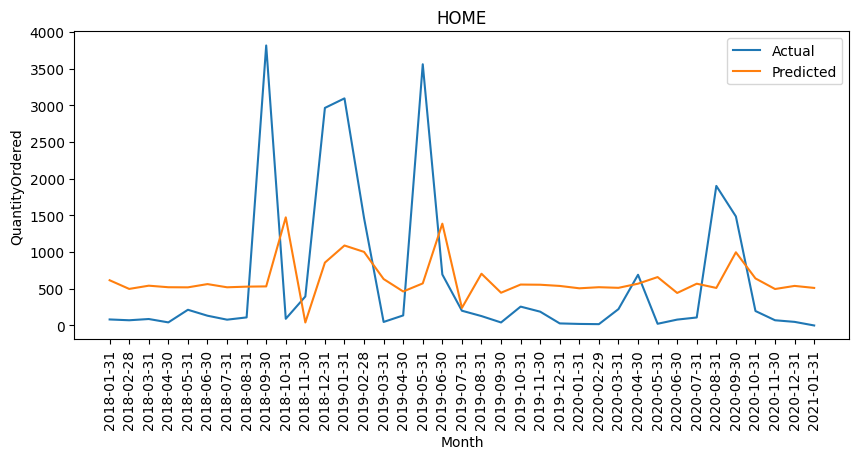

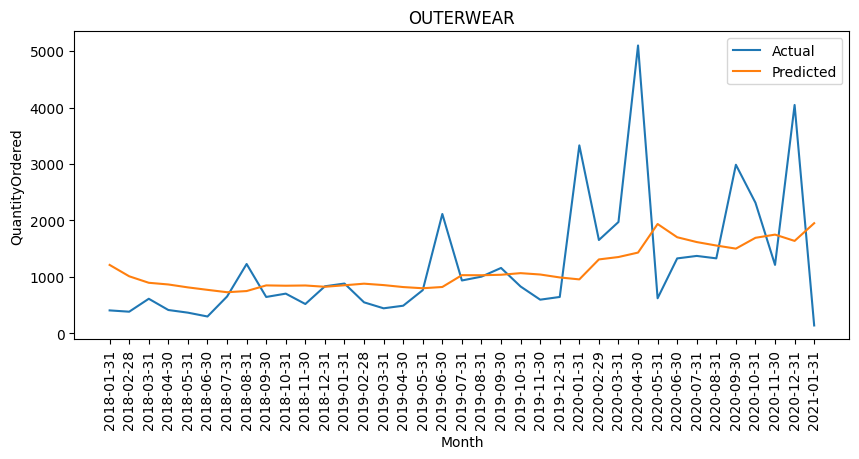

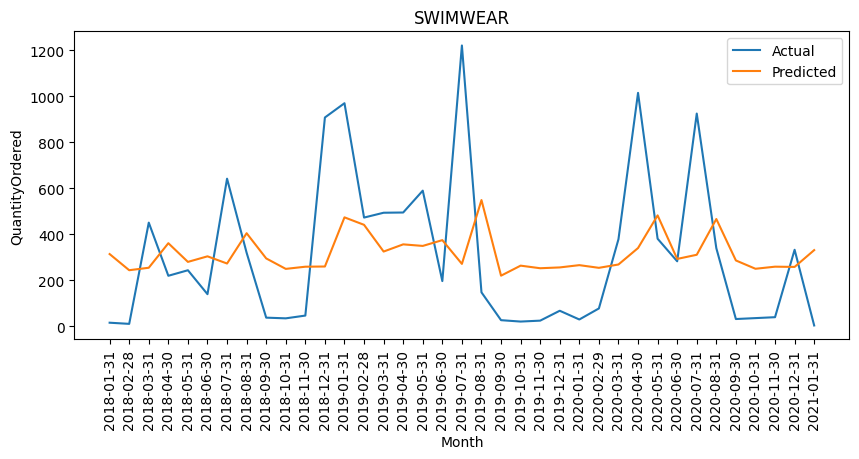

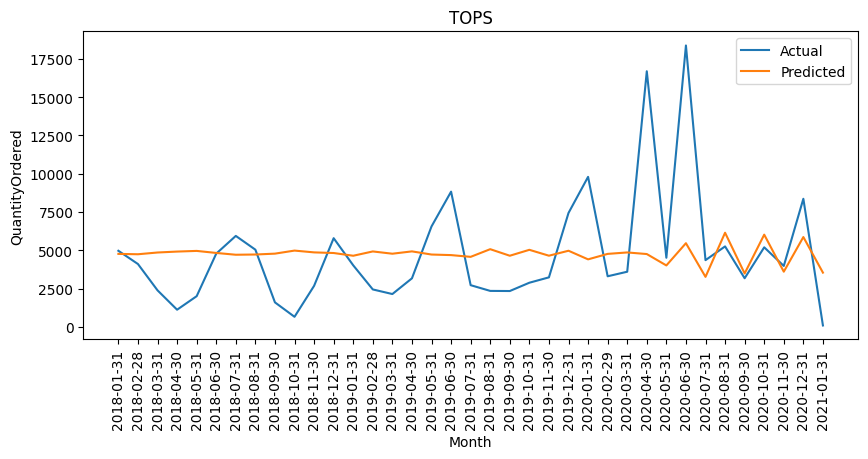

In [ ]:
for group in monthly_df.columns:

  plt.figure(figsize=(10, 4))
  #results1 = DataFrame(monthly_df.index.astype(str), monthly_df.index.astype(str),{'Actual': monthly_df[[group]], 'Predicted': predicted_values[[group]]})
  #results1.plot()

  plt.plot(monthly_df.index.astype(str), monthly_df[[group]], label='Actual')
  plt.plot(predicted_values.index.astype(str), predicted_values[[group]], label='Predicted')

  plt.title(group)
  plt.xticks(rotation = 90)
  plt.xlabel('Month')
  plt.ylabel('QuantityOrdered')
  plt.legend()
  plt.show()

In [ ]:
#Evaluation using statistical methodes
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_values=[]
rmse_values=[]
mae_values=[]
ape_values=[]
for column in monthly_df.columns:
    mse = mean_squared_error(monthly_df[column], predicted_values[column])
    mse_values.append(mse)
    ape =np.abs(monthly_df[column], predicted_values[column])
    ape_values.append(ape)
    mae = mean_absolute_error(monthly_df[column], predicted_values[column])
    mae_values.append(mae)
avg_mse = np.mean(mse_values)
rmse = np.sqrt(avg_mse)
avg_ape=np.mean(ape_values)
avg_mape=np.mean(avg_ape)/len(monthly_df)
avg_mae=np.mean(mae_values)
mdape=np.median(ape_values)
print("The MAPE of Arima Model",avg_mape)
print("The MAE of Arima Model",avg_mae)
print("The MSE of Arima Model",avg_mse)
print("The RMSE of Arima Model",rmse)
print("The MDAPE of Arima Model",mdape)

The MAPE of Arima Model 43.53680707734762
The MAE of Arima Model 0.0
The MSE of Arima Model 2933923.6555644684
The RMSE of Arima Model 1712.8700054483027
The MDAPE of Arima Model 893.0


In [ ]:
monthlycollection_df = df.groupby([pd.Grouper(freq='M'), 'Collection'])['QuantityOrdered'].sum().unstack().fillna(0)

In [ ]:
monthlycollection_df

In [ ]:
monthlycollection_df.plot(subplots=True, figsize=(12, 20), layout=(-1, 2))
plt.show()

In [ ]:
# Create a summary dataframe with the predicted values for each Collection
summary_df = pd.DataFrame(index=monthlycollection_df.columns, columns=['February', 'March', 'April', 'May', 'June','July'])

for group in monthlycollection_df.columns:
    group_df = monthlycollection_df[[group]].resample('M').sum()
    train_data = group_df.loc[:'2020-01-31']
    test_data = group_df.loc['2020-02-29':]
    model = ARIMA(train_data, order=(1, 0, 2))
    fit_model = model.fit()
    steps = 365
    preds = fit_model.forecast(steps, exog=None, alpha=0.05)

    summary_df.loc[group] = [int(preds[0]), int(preds[1]), int(preds[2]), int(preds[3]), int(preds[4]), int(preds[5])]

# Print the summary dataframe
print(summary_df)

In [ ]:
monthlyBabyJunior_df = df.groupby([pd.Grouper(freq='M'), 'BabyJunior'])['QuantityOrdered'].sum().unstack().fillna(0)

In [ ]:
monthlyBabyJunior_df

In [ ]:
monthlyBabyJunior_df.plot(subplots=True, figsize=(12, 20), layout=(-1, 2))
plt.show()

In [ ]:
# Create a summary dataframe with the predicted values for each Collection
summaryBabyJunior_df = pd.DataFrame(index=monthlyBabyJunior_df.columns, columns=[ 'February', 'March', 'April', 'May', 'June','July'])

for group in monthlyBabyJunior_df.columns:
    group_df = monthlyBabyJunior_df[[group]].resample('M').sum()
    train_data = group_df.loc[:'2020-01-31']
    test_data = group_df.loc['2020-02-29':]
    model = ARIMA(train_data, order=(1, 1, 1))
    fit_model = model.fit()
    steps = 365
    preds = fit_model.forecast(steps, exog=None, alpha=0.05)

    summaryBabyJunior_df.loc[group] = [int(preds[0]), int(preds[1]), int(preds[2]), int(preds[3]), int(preds[4]), int(preds[5])]

# Print the summary dataframe
print(summaryBabyJunior_df)

In [ ]:
monthlyArticleGenre_df = df.groupby([pd.Grouper(freq='M'), 'ArticleGenre'])['QuantityOrdered'].sum().unstack().fillna(0)

In [ ]:
monthlyArticleGenre_df

In [ ]:
monthlyArticleGenre_df.plot(subplots=True, figsize=(12, 20), layout=(-1, 2))
plt.show()

In [ ]:
# Create a summary dataframe with the predicted values for each Collection
summaryArticleGenre_df = pd.DataFrame(index=monthlyArticleGenre_df.columns, columns=['February', 'March', 'April', 'May', 'June', 'July'])

for group in monthlyArticleGenre_df.columns:
    group_df = monthlyArticleGenre_df[[group]].resample('M').sum()
    train_data = group_df.loc[:'2020-01-31']
    test_data = group_df.loc['2020-02-29':]
    model = ARIMA(train_data, order=(1, 1, 1))
    fit_model = model.fit()
    steps = 365
    preds = fit_model.forecast(steps, exog=None, alpha=0.05)

    summaryArticleGenre_df.loc[group] = [int(preds[0]), int(preds[1]), int(preds[2]), int(preds[3]), int(preds[4]), int(preds[5])]

# Print the summary dataframe
print(summaryArticleGenre_df)